In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import date
import matplotlib.pyplot as plt
import pandas_datareader as data
import pandas_datareader.data as web
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols
from pandas_datareader._utils import RemoteDataError
from datetime import datetime, timedelta
import pickle


In [3]:
start = '2010-01-01'
end   = date.today().strftime("%Y-%m-%d")

# df = data.DataReader('AAPL',data_source='yahoo',start=start,end=end)
df = yf.download('BHARTIARTL.NS',start=start,end=end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,302.861145,304.927032,297.352051,298.591614,280.579346,3215431
2010-01-05,301.392059,304.835205,298.867065,303.320221,285.022736,4685390
2010-01-06,305.707489,307.727478,299.417969,300.106598,282.002930,4802900
2010-01-07,301.483856,306.671570,301.162506,302.447968,284.203094,4213709
2010-01-08,302.769318,304.330231,298.086609,298.453888,280.449951,2892365


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-09,770.000000,775.099976,761.299988,766.650024,766.650024,5913945
2023-02-10,768.950012,773.200012,761.000000,771.950012,771.950012,2954992
2023-02-13,771.000000,779.599976,766.700012,768.599976,768.599976,3705892
2023-02-14,769.000000,777.599976,766.200012,775.200012,775.200012,3502010
2023-02-15,775.000000,787.150024,772.200012,785.400024,785.400024,3602838


In [5]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,302.861145,304.927032,297.352051,298.591614,280.579346,3215431
1,2010-01-05,301.392059,304.835205,298.867065,303.320221,285.022736,4685390
2,2010-01-06,305.707489,307.727478,299.417969,300.106598,282.002930,4802900
3,2010-01-07,301.483856,306.671570,301.162506,302.447968,284.203094,4213709
4,2010-01-08,302.769318,304.330231,298.086609,298.453888,280.449951,2892365


In [6]:
df = df.drop(['Adj Close'],axis=1)

In [7]:
df

,Date,Open,High,Low,Close,Volume
0,2010-01-04,302.861145,304.927032,297.352051,298.591614,3215431
1,2010-01-05,301.392059,304.835205,298.867065,303.320221,4685390
2,2010-01-06,305.707489,307.727478,299.417969,300.106598,4802900
3,2010-01-07,301.483856,306.671570,301.162506,302.447968,4213709
4,2010-01-08,302.769318,304.330231,298.086609,298.453888,2892365
...,...,...,...,...,...,...
3236,2023-02-09,770.000000,775.099976,761.299988,766.650024,5913945
3237,2023-02-10,768.950012,773.200012,761.000000,771.950012,2954992
3238,2023-02-13,771.000000,779.599976,766.700012,768.599976,3705892
3239,2023-02-14,769.000000,777.599976,766.200012,775.200012,3502010


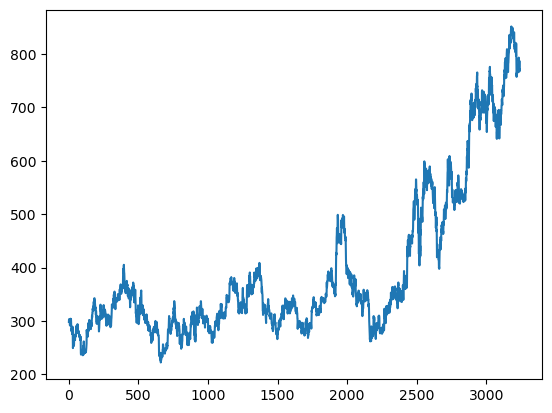

In [8]:
plt.plot(df.Close)

In [9]:
df

,Date,Open,High,Low,Close,Volume
0,2010-01-04,302.861145,304.927032,297.352051,298.591614,3215431
1,2010-01-05,301.392059,304.835205,298.867065,303.320221,4685390
2,2010-01-06,305.707489,307.727478,299.417969,300.106598,4802900
3,2010-01-07,301.483856,306.671570,301.162506,302.447968,4213709
4,2010-01-08,302.769318,304.330231,298.086609,298.453888,2892365
...,...,...,...,...,...,...
3236,2023-02-09,770.000000,775.099976,761.299988,766.650024,5913945
3237,2023-02-10,768.950012,773.200012,761.000000,771.950012,2954992
3238,2023-02-13,771.000000,779.599976,766.700012,768.599976,3705892
3239,2023-02-14,769.000000,777.599976,766.200012,775.200012,3502010


In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3236    804.034999
3237    803.927000
3238    803.691499
3239    803.641499
3240    803.654500
Name: Close, Length: 3241, dtype: float64

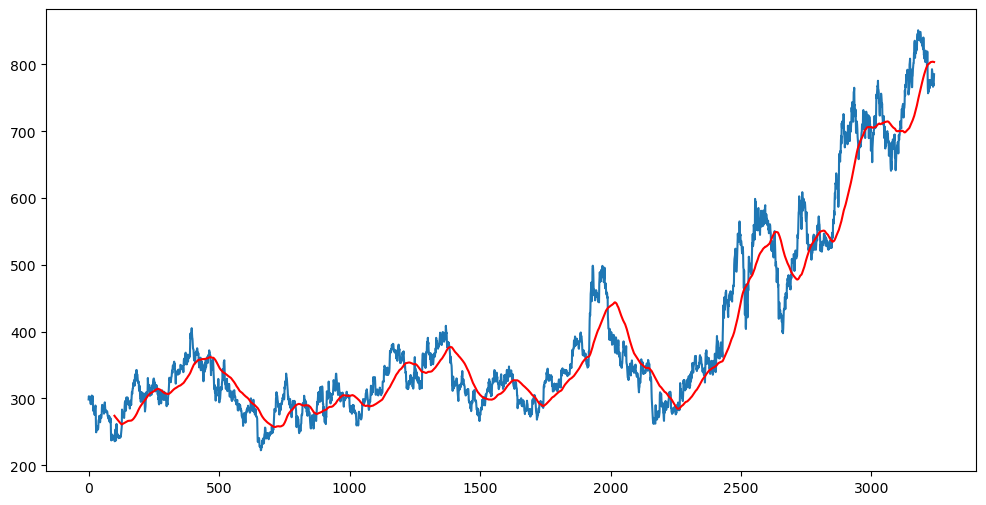

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [12]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3236    752.69500
3237    752.77325
3238    752.85375
3239    752.99300
3240    753.22500
Name: Close, Length: 3241, dtype: float64

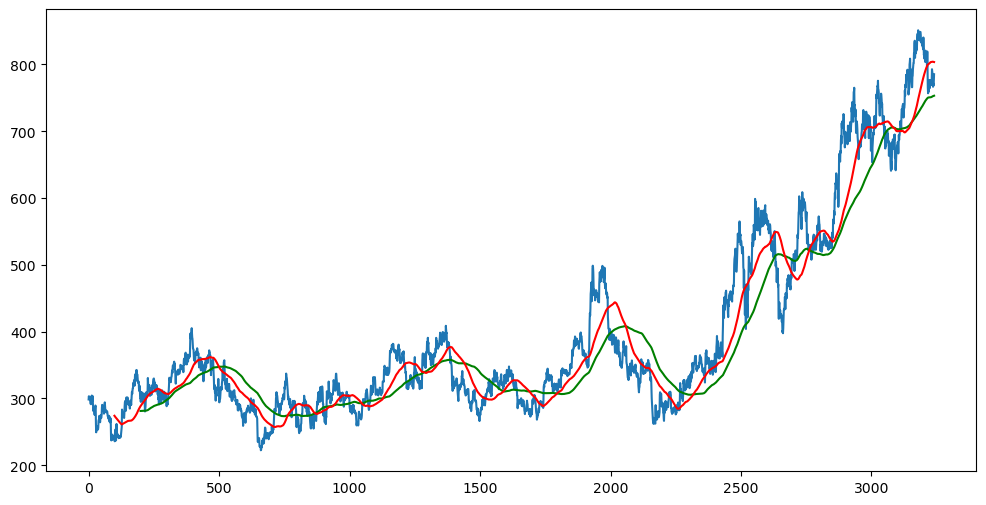

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma200,'g')
plt.plot(ma100,'r')

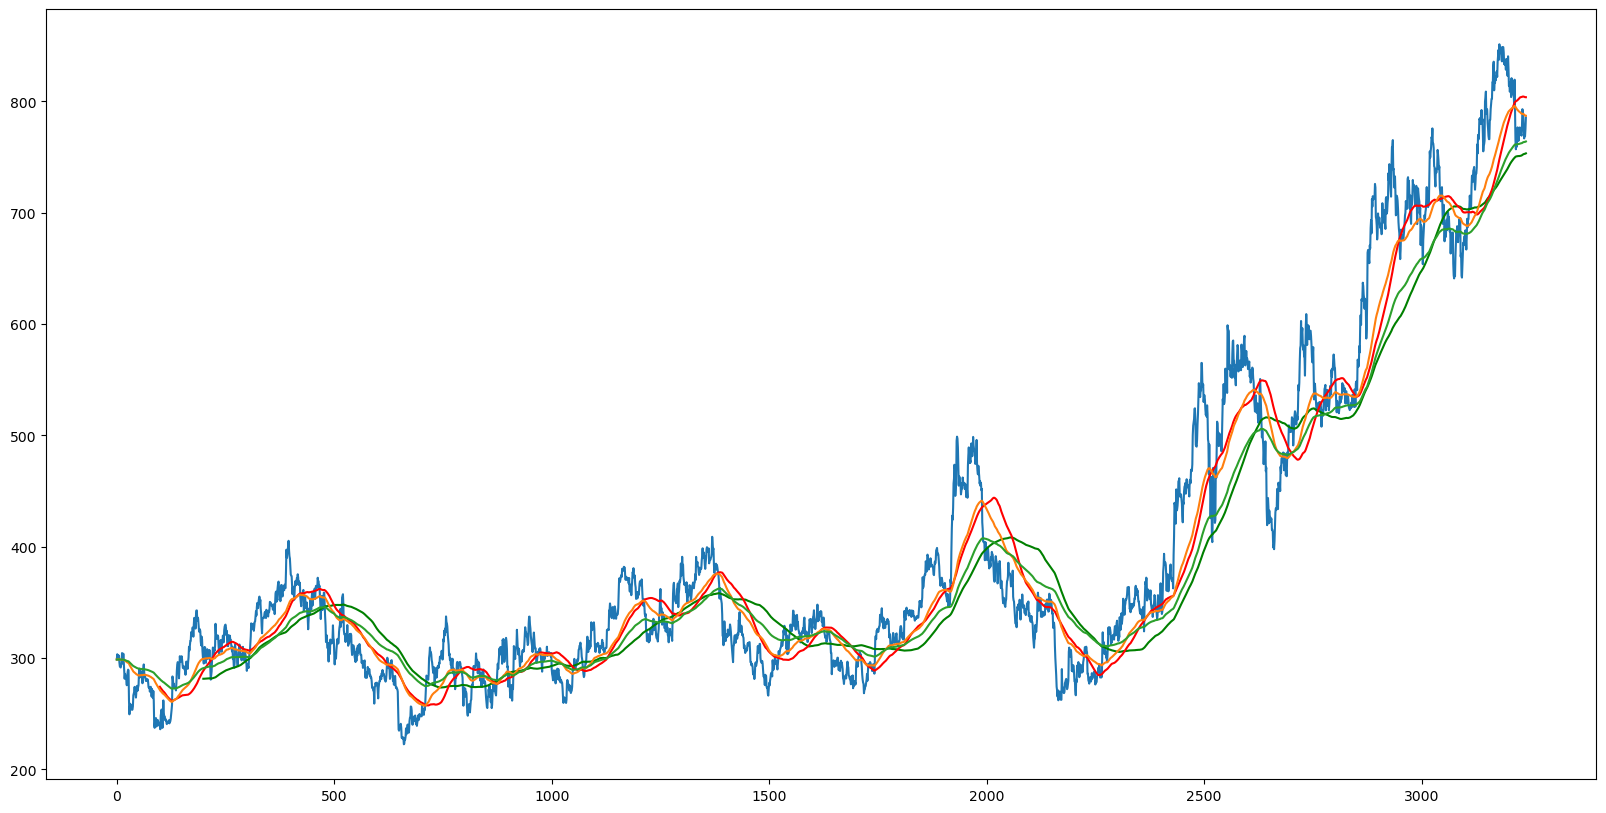

In [14]:
EMA100 = df['Close'].ewm(span=100, adjust=False).mean()
EMA200= df['Close'].ewm(span=200, adjust=False).mean()

plt.figure(figsize=(20,10))
plt.plot(df.Close)
plt.plot(ma200,'g')
plt.plot(ma100,'r')
plt.plot(EMA100,)
plt.plot(EMA200)

In [15]:
df.shape

(3241, 6)

In [16]:
data_trainig = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_trainig.shape,data_testing.shape)

(2268, 1) (973, 1)


In [17]:
data_trainig.head()

,Close
0,298.591614
1,303.320221
2,300.106598
3,302.447968
4,298.453888


In [18]:
data_testing.head()

,Close
2268,310.114746
2269,314.384277
2270,310.068848
2271,303.595673
2272,309.196564


In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

In [20]:
data_trainig_array = scaler.fit_transform(data_trainig)
data_trainig_array

array([[0.27550683],
       [0.29262211],
       [0.28099034],
       ...,
       [0.22067126],
       [0.30408775],
       [0.36390822]])

In [21]:
x_train = []
y_train = []
x_val = []
y_val =[] 

for i in range(100,data_trainig_array.shape[0]) :
    
    x_train.append(data_trainig_array[i-100 : i])
    y_train.append(data_trainig_array[i,0])
    

x_train , y_train = np.array(x_train) , np.array(y_train)


In [22]:
x_train.shape
# y_train.shape

(2168, 100, 1)

### ML MODEL

In [23]:
from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential , load_model
import keras

In [24]:
model = Sequential()


model.add(LSTM(units=50,activation='relu',
            return_sequences=True,
            input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',
            return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=60,activation='relu',
            return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',
            return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=120,activation='relu',
            return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',
            return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',
            return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=120,activation='relu'))

model.add(Dropout(0.5))


model.add(Dense(units=1))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 60)           29040     
                                                                 
 dropout_2 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 80)           4

In [26]:
model.compile(optimizer='adam',
            loss='mean_squared_error')
model.fit(x_train,y_train,epochs = 50)

Epoch 1/50
68/68 [==============================] - 96s 1s/step - loss: 0.0432
Epoch 2/50
68/68 [==============================] - 88s 1s/step - loss: 0.0250
Epoch 3/50
68/68 [==============================] - 89s 1s/step - loss: 0.0162
Epoch 4/50
68/68 [==============================] - 89s 1s/step - loss: 0.0121
Epoch 5/50
68/68 [==============================] - 88s 1s/step - loss: 0.0119
Epoch 6/50
68/68 [==============================] - 89s 1s/step - loss: 0.0113
Epoch 7/50
68/68 [==============================] - 88s 1s/step - loss: 0.0107
Epoch 8/50
68/68 [==============================] - 87s 1s/step - loss: 0.0100
Epoch 9/50
68/68 [==============================] - 88s 1s/step - loss: 0.0096
Epoch 10/50
68/68 [==============================] - 90s 1s/step - loss: 0.0087
Epoch 11/50
68/68 [==============================] - 88s 1s/step - loss: 0.0077
Epoch 12/50
68/68 [==============================] - 88s 1s/step - loss: 0.0075
Epoch 13/50
68/68 [==============================

<AxesSubplot:>

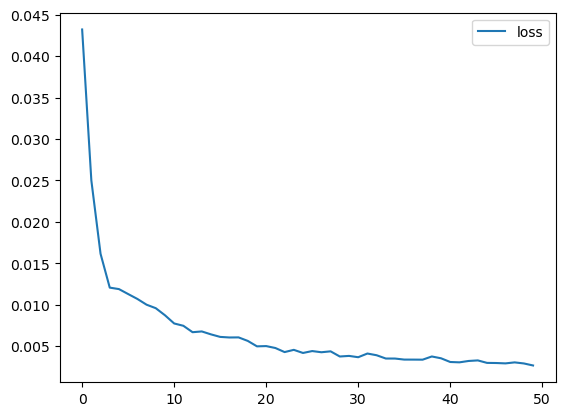

In [27]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [28]:
model.save('keras_stock_new.h5')

In [130]:
data_testing.head()

,Close
2268,310.114746
2269,314.384277
2270,310.068848
2271,303.595673
2272,309.196564


In [131]:
past100 = data_trainig.tail(100)
past100

,Close
2168,269.944427
2169,264.894470
2170,263.792633
2171,262.369476
2172,262.507202
...,...
2263,284.084381
2264,282.477570
2265,283.441650
2266,306.487946


In [132]:
data_testing

,Close
2268,310.114746
2269,314.384277
2270,310.068848
2271,303.595673
2272,309.196564
...,...
3236,766.650024
3237,771.950012
3238,768.599976
3239,775.200012


In [133]:
final_df = past100.append(data_testing,ignore_index=True)

In [134]:
final_df.shape

(1073, 1)

In [135]:
final_df

,Close
0,269.944427
1,264.894470
2,263.792633
3,262.369476
4,262.507202
...,...
1068,766.650024
1069,771.950012
1070,768.599976
1071,775.200012


In [136]:
input_data = scaler.fit_transform(final_df)
input_data.shape

(1073, 1)

In [137]:
input_data.shape

(1073, 1)

In [138]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]) :
    
    x_test.append(input_data[i-100 : i])
    y_test.append(input_data[i,0])
    
x_test , y_test = np.array(x_test) , np.array(y_test)

In [139]:
x_test.shape

(973, 100, 1)

In [140]:
y_test.shape

(973,)

In [141]:
model = load_model('/kaggle/input/model1/keras_stock1.h5')
y_predicted = model.predict(x_test)

31/31 [==============================] - 2s 63ms/step


In [142]:
real_data = df.Close
real_data = pd.DataFrame(real_data)
print(real_data.shape)
real_data


(3241, 1)


,Close
0,298.591614
1,303.320221
2,300.106598
3,302.447968
4,298.453888
...,...
3236,766.650024
3237,771.950012
3238,768.599976
3239,775.200012


In [143]:
real_data1 = scaler.fit_transform(real_data)
real_data1.shape

(3241, 1)

In [144]:
real_data_1 = []

for i in range(100 , real_data1.shape[0]) :
    real_data_1.append(real_data1[i-100 : i])
    
real_data_1 = np.array(real_data_1)
real_data_1.shape

(3141, 100, 1)

In [145]:
preedicted_data = model.predict(real_data_1)

99/99 [==============================] - 6s 65ms/step


In [146]:
real_data = pd.DataFrame(real_data)
real_data

,Close
0,298.591614
1,303.320221
2,300.106598
3,302.447968
4,298.453888
...,...
3236,766.650024
3237,771.950012
3238,768.599976
3239,775.200012


In [147]:
y_predicted[967]

array([0.86727726], dtype=float32)

In [148]:
y_test.shape

(973,)

In [149]:
scaler.scale_[0]

0.001590519517367997

In [150]:
scale_factor = 1/0.001590519517367997
y_predicted = y_predicted * scale_factor
preedicted_data = preedicted_data * scale_factor
y_test = y_test * scale_factor

In [151]:
preedicted_data

array([[ 65.16425],
       [ 64.07057],
       [ 65.89928],
       ...,
       [546.17236],
       [542.7087 ],
       [540.1348 ]], dtype=float32)

In [152]:
y_predicted.shape

(973, 1)

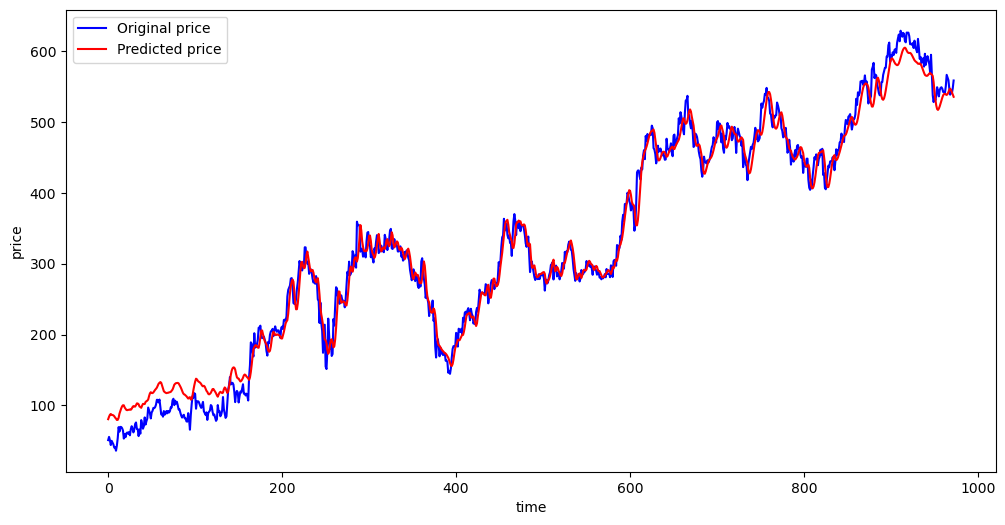

In [153]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'Original price')
plt.plot(y_predicted,'r',label = 'Predicted price')

plt.xlabel('time')
plt.ylabel('price')

plt.legend()

plt.show()

In [72]:
def plot_stock_trend_and_returns(ticker, titles, start_date, end_date, all_returns):
    
    #get the data for this ticker
    prices = web.DataReader(ticker, 'yahoo', start=start_date, end=end_date).Close
    prices.index = [d.date() for d in prices.index]
    
    plt.figure(figsize=(10,6))
    
    #plot stock price
    plt.subplot(2,1,1)
    plt.plot(prices)
    plt.title(titles[0], fontsize=16)
    plt.ylabel('Price ($)', fontsize=14)
    
    #plot stock returns
    plt.subplot(2,1,2)
    plt.plot(all_returns[0], all_returns[1], color='g')
    plt.title(titles[1], fontsize=16)
    plt.ylabel('Pct. Return', fontsize=14)
    plt.axhline(0, color='k', linestyle='--')
    
    plt.tight_layout()
    
    plt.show()

In [77]:
def perform_analysis_for_stock(ticker, start_date, end_date, return_period_weeks, verbose=False):
        """
        Inputs:
            ticker: the ticker symbol to analyze
            start_date: the first date considered in simulation
            end_date: the last date considered in simulation
            return_period_weeks: the number of weeks in which to calculate returns
            verbose: True if you want to print simulation steps

        Outputs:
            average and standard deviation of returns for simulated runs of this ticker within the given date range
        """

        #get the data for this ticker
        try:
            prices = yf.download(ticker,start=start,end=end).Close
#             prices = web.DataReader(ticker, 'yahoo', start=start_date, end=end_date).Close
        #could not find data on this ticker
        except (RemoteDataError, KeyError):
            #return default values
            return -np.inf, np.inf, None

        prices.index = [d.date() for d in prices.index]

        #this will store all simulated returns
        pct_return_after_period = []
        buy_dates = []

        #assume we buy the stock on each day in the range
        for buy_date, buy_price in prices.iteritems():
            #get price of the stock after given number of weeks
            sell_date = buy_date + timedelta(weeks=return_period_weeks)

            try:
                sell_price = prices[prices.index == sell_date].iloc[0]
            #trying to sell on a non-trading day, skip
            except IndexError:
                continue
        #compute the percent return
            pct_return = (sell_price - buy_price)/buy_price
            pct_return_after_period.append(pct_return)
            buy_dates.append(buy_date)

            if verbose:
                print('Date Buy: %s, Price Buy: %s'%(buy_date,round(buy_price,2)))
                print('Date Sell: %s, Price Sell: %s'%(sell_date,round(sell_price,2)))
                print('Return: %s%%'%round(pct_return*100,1))
                print('-------------------')

        #if no data collected return default values
        if len(pct_return_after_period) == 0:
            return -np.inf, np.inf, None

        #report average and deviation of the percent returns
        return np.mean(pct_return_after_period), np.std(pct_return_after_period), [buy_dates, pct_return_after_period]                

In [78]:
#start date for simulation. 
#Further back means more training data but risk of including patterns that no longer exist
#More recent means less training data but only using recent patterns
start_date, end_date = datetime(2020,4,1), datetime.now().date()

#set number of weeks in which you want to see return
return_period_weeks = 4

#I want at least this much average return
min_avg_return  = 0.1

#I want at most this much volatility in return
max_dev_return = 0.07

In [79]:
# Download file "series_tickers.p" from github or create your own list of tickers
series_tickers = pickle.load(open("/kaggle/input/ticker/series_tickers.p", "rb" ))

In [80]:
for ticker, name in series_tickers.iteritems():
    avg_return, dev_return, all_returns = perform_analysis_for_stock(ticker, start_date, end_date, return_period_weeks)

    if avg_return > min_avg_return and dev_return < max_dev_return:
        title_price = '%s\n%s'%(ticker, name)
        title_return = 'Avg Return: %s%% | Dev Return: %s%%'%(round(100*avg_return,2), round(100*dev_return,2))
        plot_stock_trend_and_returns(ticker, [title_price, title_return], start_date, end_date, all_returns)

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- VG: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ALXN: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- LLNW: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- MXIM: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%******

In [81]:
#define the ticker symbol
tickerSymbol = 'AAPL'

In [82]:
#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

In [83]:
#get the historical prices for this ticker
tickerDf = tickerData.history(interval='1d', start='2019-1-1', end='2020-4-10')

In [84]:
priceData = tickerDf.Open

In [85]:
priceData = priceData.asfreq(pd.infer_freq(priceData.index))

In [86]:
priceData

Date
2019-01-02 00:00:00-05:00    37.317041
2019-01-03 00:00:00-05:00    34.688538
2019-01-04 00:00:00-05:00    34.821050
2019-01-05 00:00:00-05:00          NaN
2019-01-06 00:00:00-05:00          NaN
                               ...    
2020-04-05 00:00:00-04:00          NaN
2020-04-06 00:00:00-04:00    61.502204
2020-04-07 00:00:00-04:00    66.380218
2020-04-08 00:00:00-04:00    64.404497
2020-04-09 00:00:00-04:00    65.865467
Freq: D, Name: Open, Length: 464, dtype: float64

Text(0.5, 1.0, 'AAPL Price Data')

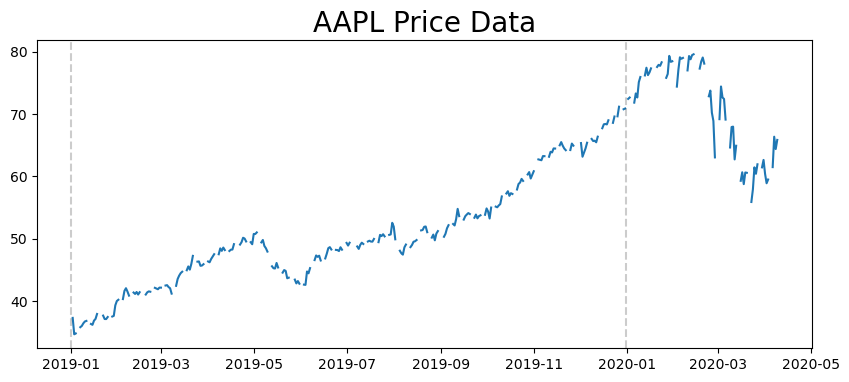

In [87]:
plt.figure(figsize=(10,4))
plt.plot(priceData)
for year in range(priceData.index[0].year, priceData.index[-1].year+1):
    plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.2)
plt.title("%s Price Data"%tickerSymbol, fontsize=20)

In [88]:
def get_buying_selling_days(price_data, b, s):
    
    #get the percent change day after day
    pct_change = price_data.pct_change()[1:]
    
    #this function checks the buying condition
    def buying_condition(sub_series):
        return (sub_series > 0).all()
    
    #this function checks the selling condition
    def selling_condition(sub_series):
        return (sub_series < 0).all()
    
    #get all buying days in the data
    buying_days = pct_change.rolling(b).apply(buying_condition)
    
    #get all potential selling days in the data
    potential_selling_days = pct_change.rolling(s).apply(selling_condition)
    
    #return a dictionary
    return {'buying_days': buying_days, 'potential_selling_days': potential_selling_days}

In [89]:
info_dict = get_buying_selling_days(priceData, 4, 1)

In [90]:
buying_days = info_dict['buying_days']
potential_selling_days = info_dict['potential_selling_days']

In [91]:
#create dataframe to store information
df_stocks = pd.DataFrame(index = buying_days.index)

In [92]:
#populate df with buying days, possible selling days, and price
df_stocks['buying_day'] = (buying_days == 1)
df_stocks['potential_selling_day'] = (potential_selling_days == 1)
df_stocks['price'] = priceData

#only keep days that are buying or possible selling days
df_stocks = df_stocks[(df_stocks.buying_day | df_stocks.potential_selling_day)]

In [93]:
df_stocks.head()

,buying_day,potential_selling_day,price
Date,,,
2019-01-03 00:00:00-05:00,False,True,34.688538
2019-01-10 00:00:00-05:00,True,False,36.741223
2019-01-11 00:00:00-05:00,True,False,36.832777
2019-01-14 00:00:00-05:00,False,True,36.343705
2019-01-15 00:00:00-05:00,False,True,36.203962


In [94]:
def check_cumulative_percent_change(price_data, buy_date, potential_sell_date):
    """
    This helper function will check if the cumulative percent change
    between a buying and potential selling day yields overall growth
    """
    
    #get the percent change day after day
    pct_change = price_data.pct_change()[1:]
    
    sub_series = 1 + pct_change[buy_date + timedelta(hours=1): potential_sell_date]

    return sub_series.product() > 1

In [95]:
def get_investing_result(df_stocks, starting_funds, verbose=False):
    
    #get a copy of price data
    price_data = df_stocks.price
    
    #at start, not holding any shares
    holding = False
    
    #init vars
    current_funds = starting_funds
    current_shares = 0
    last_buy_date = None
    
    #init dict of buying and selling dates
    events_list = []
    
    #for each buying day and potential selling day...
    for date,data in df_stocks.iterrows():
        
        #if not currently holding shares, and this is a buying day...
        if (not holding) and data.buying_day:
            
            #calculate the number of shares we can buy
            num_shares_to_buy = int(current_funds / data.price)
            
            #update number of shares
            current_shares += num_shares_to_buy
            
            #decrease current funds
            current_funds -= num_shares_to_buy * data.price
            
            #set last buy date
            last_buy_date = date
            events_list.append(('b', date))
            
            #we are now holding shares
            holding = True
            if verbose:
                print('Bought %s shares at $%s on %s totaling $%s'%(num_shares_to_buy, data.price, date.date(), round(num_shares_to_buy*data.price,2)))
        
        #if you are holding shares, and this is a potential selling day...
        elif holding and data.potential_selling_day:
            
            #check to make sure we're making a profit
            if check_cumulative_percent_change(price_data, last_buy_date, date):
                #add to our current funds
                current_funds += current_shares * data.price
                
                if verbose:
                    print('Sold %s shares at $%s on %s totaling $%s'%(current_shares, data.price, date.date(), round(num_shares_to_buy*data.price,2)))
                    print('--------------------------------------')
                    
                #reset current shares
                current_shares = 0
                
                #we are no longer holding shares
                holding = False
                
                events_list.append(('s', date))
                
    #get the stock price at the end of the time span
    final_stock_price = price_data[-1]
        
    #get the final total value of all assets (funds + stock value)
    final_value = current_funds + final_stock_price * current_shares
    
    #return the percent change in value
    return round((final_value - starting_funds) / starting_funds,2), events_list            

In [96]:
percent_change, events_list = get_investing_result(df_stocks, 10000, True)

Bought 272 shares at $36.74122349293914 on 2019-01-10 totaling $9993.61
Sold 272 shares at $37.68325560582856 on 2019-01-22 totaling $10249.85
--------------------------------------
Bought 256 shares at $40.02022540945785 on 2019-01-31 totaling $10245.18
Sold 256 shares at $41.53566043637564 on 2019-02-07 totaling $10633.13
--------------------------------------
Bought 239 shares at $44.49632139620826 on 2019-03-14 totaling $10634.62
Sold 239 shares at $45.06008943372017 on 2019-03-20 totaling $10769.36
--------------------------------------
Bought 221 shares at $48.66809920824569 on 2019-06-20 totaling $10755.65
Sold 221 shares at $48.92071096436694 on 2019-07-02 totaling $10811.48
--------------------------------------
Bought 217 shares at $49.80632024453321 on 2019-08-16 totaling $10807.97
Sold 217 shares at $51.06197069982617 on 2019-08-23 totaling $11080.45
--------------------------------------
Bought 186 shares at $59.6149555145816 on 2019-10-24 totaling $11088.38
Sold 186 share

In [97]:
print(percent_change)

0.11


(32.0, 83.0)

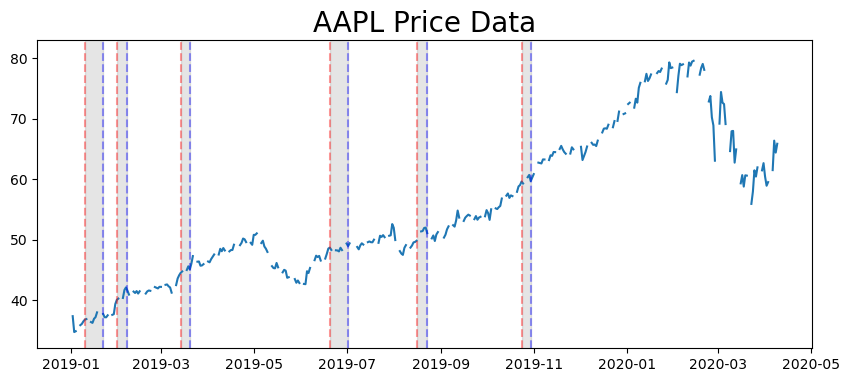

In [98]:
plt.figure(figsize=(10,4))
plt.plot(priceData)

y_lims = (int(priceData.min()*.95), int(priceData.max()*1.05))
shaded_y_lims = int(priceData.min()*.5), int(priceData.max()*1.5)

for idx, event in enumerate(events_list):
    color = 'red' if event[0] == 'b' else 'blue'
    plt.axvline(event[1], color=color, linestyle='--', alpha=0.4)
    if event[0] == 's':
        plt.fill_betweenx(range(*shaded_y_lims), 
                          event[1], events_list[idx-1][1], color='k', alpha=0.1)

plt.title("%s Price Data"%tickerSymbol, fontsize=20)
plt.ylim(*y_lims)